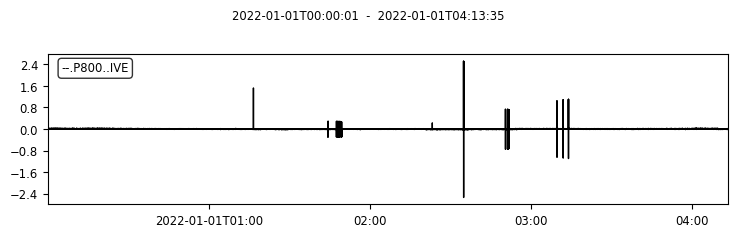

/Users/revathymp/miniconda3/envs/obspy/lib/python3.10/site-packages/obspy/core/trace.py:2158: UserWarning: The requested taper is longer than the trace. The taper will be shortened to trace length.
  warnings.warn(msg)


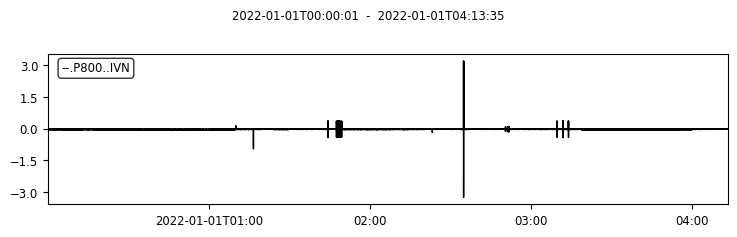

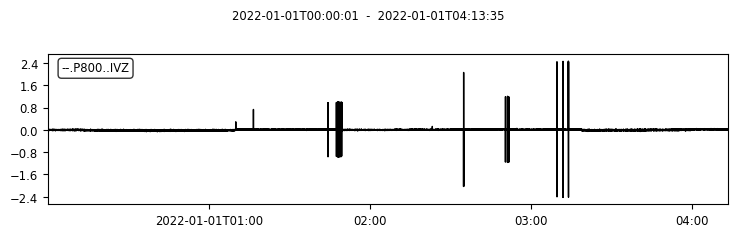

/Users/revathymp/miniconda3/envs/obspy/lib/python3.10/site-packages/obspy/core/trace.py:2158: UserWarning: The requested taper is longer than the trace. The taper will be shortened to trace length.
  warnings.warn(msg)


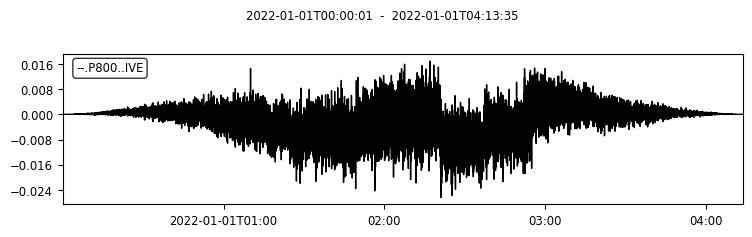

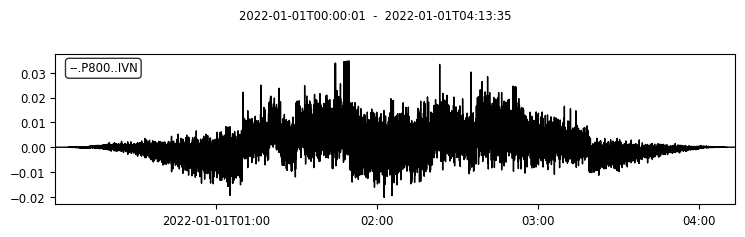

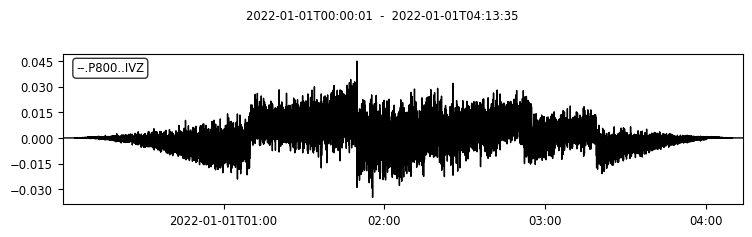

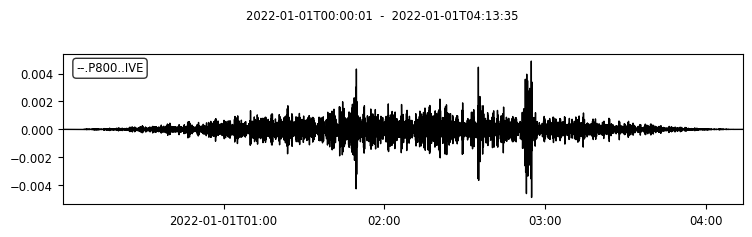

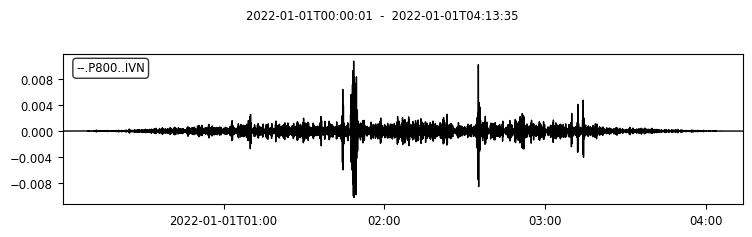

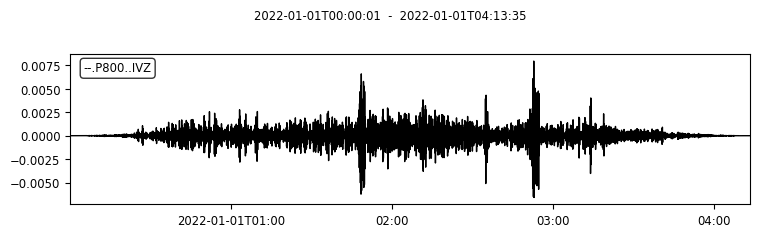

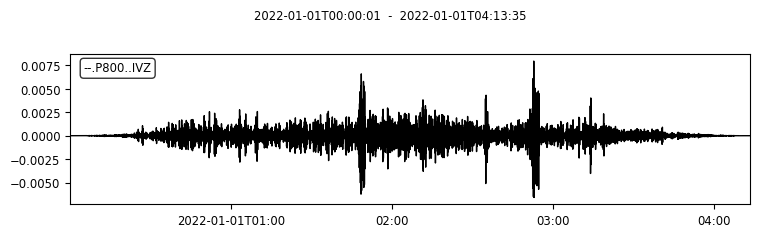

In [34]:
######### GNSS QC ############


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

    
    
# READ INSTAVEL ASCII FILE
infile = '/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/gnss_12hr/p800_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'P800'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt, dt+43200)
st_gnss_ve[0].plot()
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.05:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.05:
        st_gnss_ve[0].data[i] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
st_gnss_ve[0].taper(0.85, type="cosine")



# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_gnss_vn = Stream(Trace())
st_gnss_vn[0].stats.network = '--'
st_gnss_vn[0].stats.station = 'P800'
st_gnss_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_gnss_vn[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vn[0].stats.sampling_rate = 1
st_gnss_vn[0].stats.calib = 1
st_gnss_vn[0].data = site['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vn[0].trim(dt, dt+43200)
st_gnss_vn[0].plot()
for i in range(len(st_gnss_vn[0].data)):
    if st_gnss_vn[0].data[i] > 0.08:
        st_gnss_vn[0].data[i] = 0
    if st_gnss_vn[0].data[i] < -0.08:
        st_gnss_vn[0].data[i] = 0
st_gnss_vn[0].detrend('linear')
st_gnss_vn[0].detrend('demean')
st_gnss_vn[0].taper(0.5,type="cosine")



# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_gnss_vz = Stream(Trace())
st_gnss_vz[0].stats.network = '--'
st_gnss_vz[0].stats.station = 'P800'
st_gnss_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_gnss_vz[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vz[0].stats.sampling_rate = 1
st_gnss_vz[0].stats.calib = 1
st_gnss_vz[0].data = site['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vz[0].trim(dt, dt+43200)
st_gnss_vz[0].plot()
for i in range(len(st_gnss_vz[0].data)):
    if st_gnss_vz[0].data[i] > 0.05:
        st_gnss_vz[0].data[i] = 0
    if st_gnss_vz[0].data[i] < -0.05:
        st_gnss_vz[0].data[i] = 0
st_gnss_vz[0].detrend('linear')
st_gnss_vz[0].detrend('demean')
st_gnss_vz[0].taper(0.85,type="cosine")


st_gnss_ve[0].plot()
st_gnss_vn[0].plot()
st_gnss_vz[0].plot()

st_gnss_fe = st_gnss_ve[0].copy()
st_gnss_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fe.plot()
st_gnss_fn = st_gnss_vn[0].copy()
st_gnss_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fn.plot()
st_gnss_fz = st_gnss_vz[0].copy()
st_gnss_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fz.plot()

#plt.show()
#fig.savefig("../P483-JEM.pdf")
#fig.savefig("../P483-JEM.png")


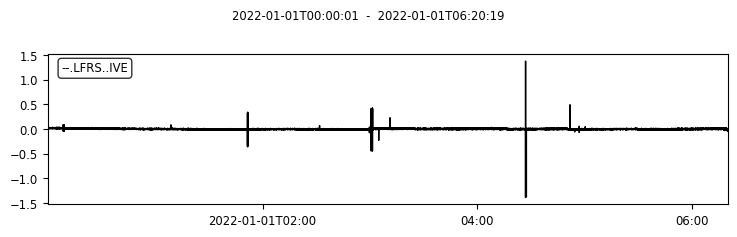

/Users/revathymp/miniconda3/envs/obspy/lib/python3.10/site-packages/obspy/core/trace.py:2158: UserWarning: The requested taper is longer than the trace. The taper will be shortened to trace length.
  warnings.warn(msg)


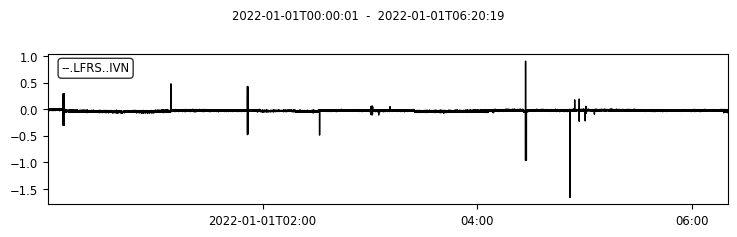

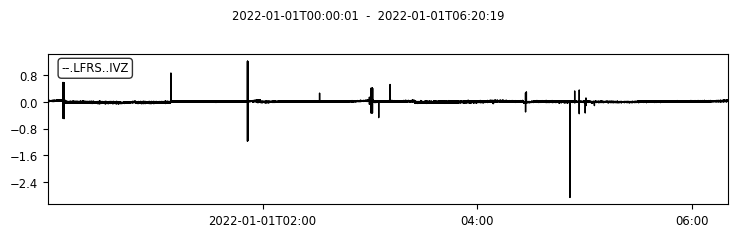

/Users/revathymp/miniconda3/envs/obspy/lib/python3.10/site-packages/obspy/core/trace.py:2158: UserWarning: The requested taper is longer than the trace. The taper will be shortened to trace length.
  warnings.warn(msg)


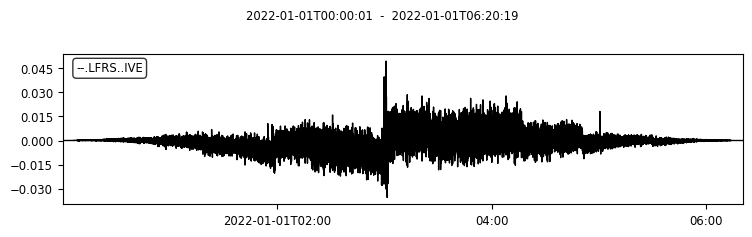

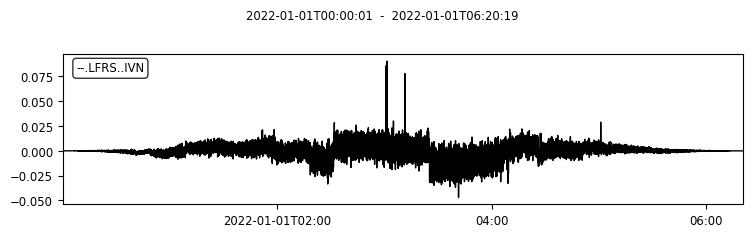

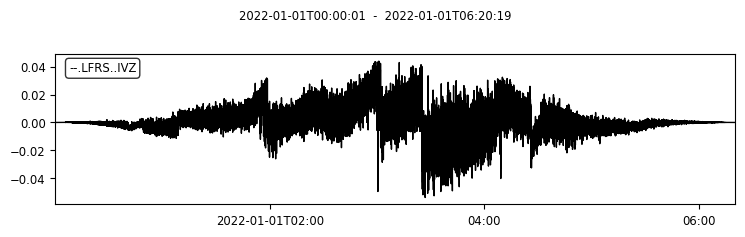

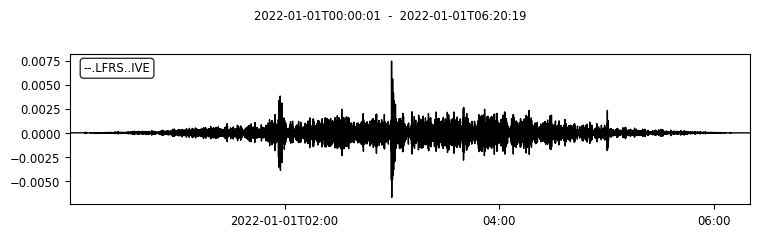

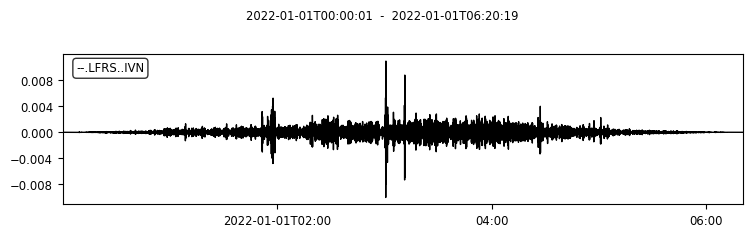

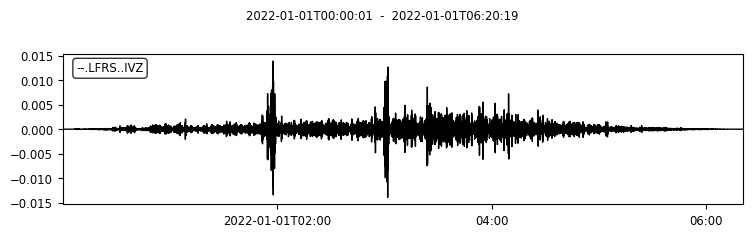

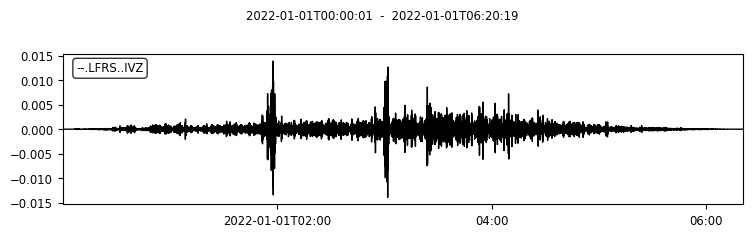

In [40]:
######### GNSS QC ############


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

    
    
# READ INSTAVEL ASCII FILE
infile = '/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/gnss_12hr/LFRS_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'LFRS'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt, dt+43200)
st_gnss_ve[0].plot()
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.05:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.05:
        st_gnss_ve[0].data[i] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
st_gnss_ve[0].taper(0.85, type="cosine")



# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_gnss_vn = Stream(Trace())
st_gnss_vn[0].stats.network = '--'
st_gnss_vn[0].stats.station = 'LFRS'
st_gnss_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_gnss_vn[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vn[0].stats.sampling_rate = 1
st_gnss_vn[0].stats.calib = 1
st_gnss_vn[0].data = site['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vn[0].trim(dt, dt+43200)
st_gnss_vn[0].plot()
for i in range(len(st_gnss_vn[0].data)):
    if st_gnss_vn[0].data[i] > 0.08:
        st_gnss_vn[0].data[i] = 0
    if st_gnss_vn[0].data[i] < -0.08:
        st_gnss_vn[0].data[i] = 0
st_gnss_vn[0].detrend('linear')
st_gnss_vn[0].detrend('demean')
st_gnss_vn[0].taper(0.5,type="cosine")



# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_gnss_vz = Stream(Trace())
st_gnss_vz[0].stats.network = '--'
st_gnss_vz[0].stats.station = 'LFRS'
st_gnss_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_gnss_vz[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vz[0].stats.sampling_rate = 1
st_gnss_vz[0].stats.calib = 1
st_gnss_vz[0].data = site['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vz[0].trim(dt, dt+43200)
st_gnss_vz[0].plot()
for i in range(len(st_gnss_vz[0].data)):
    if st_gnss_vz[0].data[i] > 0.05:
        st_gnss_vz[0].data[i] = 0
    if st_gnss_vz[0].data[i] < -0.05:
        st_gnss_vz[0].data[i] = 0
st_gnss_vz[0].detrend('linear')
st_gnss_vz[0].detrend('demean')
st_gnss_vz[0].taper(0.85,type="cosine")


st_gnss_ve[0].plot()
st_gnss_vn[0].plot()
st_gnss_vz[0].plot()

st_gnss_fe = st_gnss_ve[0].copy()
st_gnss_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fe.plot()
st_gnss_fn = st_gnss_vn[0].copy()
st_gnss_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fn.plot()
st_gnss_fz = st_gnss_vz[0].copy()
st_gnss_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fz.plot()

#plt.show()
#fig.savefig("../P483-JEM.pdf")
#fig.savefig("../P483-JEM.png")


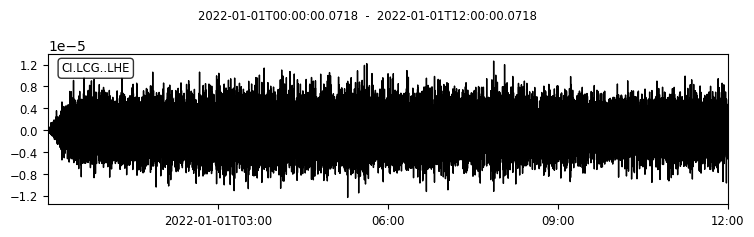

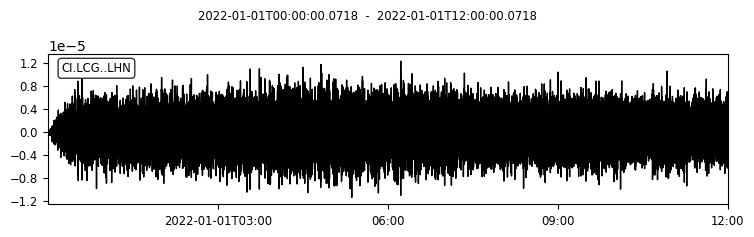

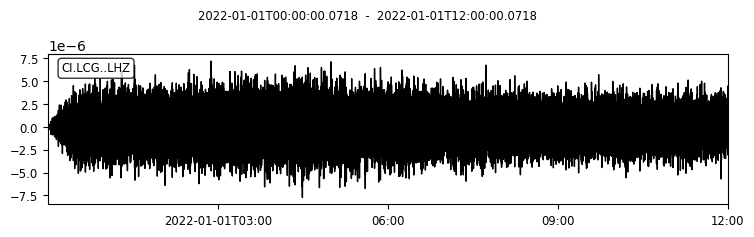

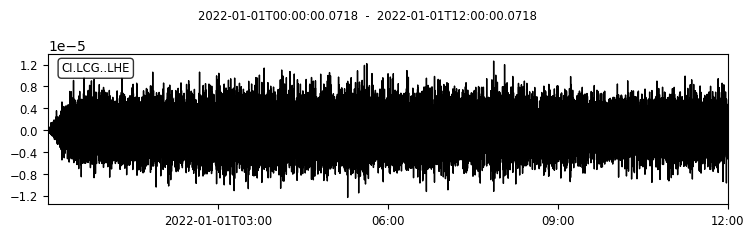

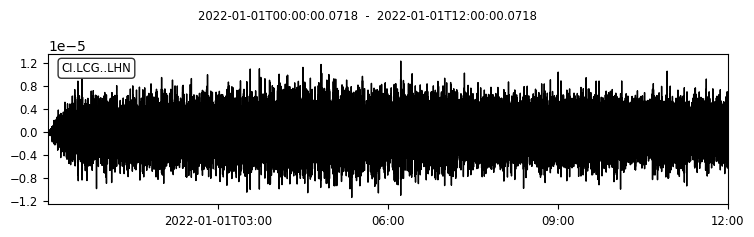

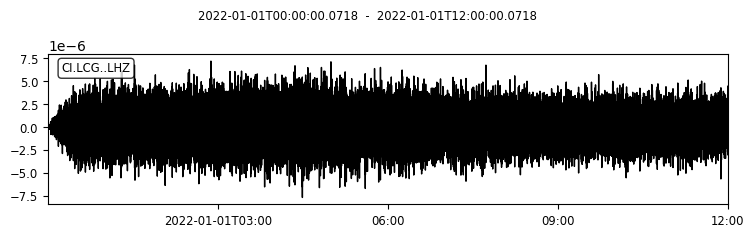

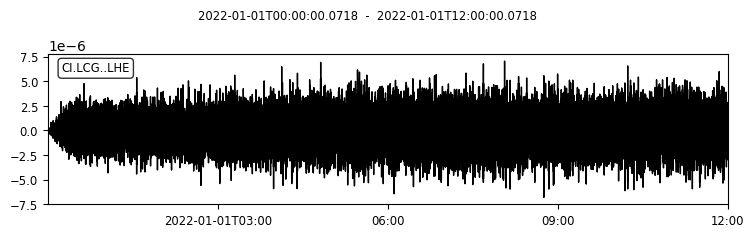

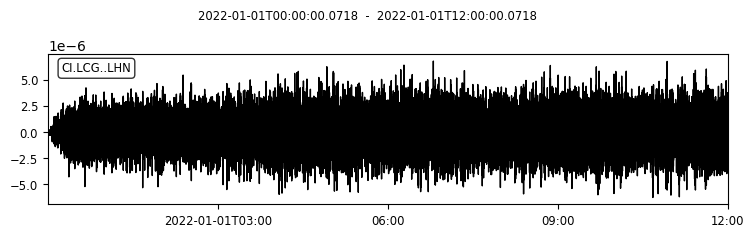

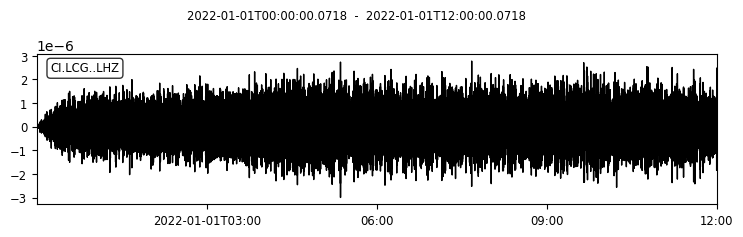

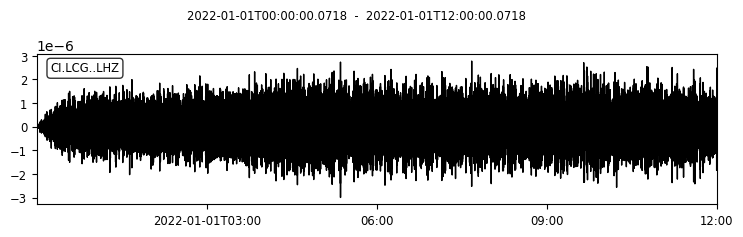

In [39]:
######## seismic QC ##################


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

# LOAD SEISMIC VELOCITY E DATA
st_seis_ve = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LCG/LHE/CI.LCG..LHE.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_ve[0].trim(dt, dt+43200)
st_seis_ve[0].plot()

# LOAD SEISMIC VELOCITY N DATA
st_seis_vn = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LCG/LHN/CI.LCG..LHN.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vn[0].trim(dt, dt+43200)
st_seis_vn[0].plot()

# LOAD SEISMIC VELOCITY Z DATA
st_seis_vz = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LCG/LHZ/CI.LCG..LHZ.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vz[0].trim(dt, dt+43200)
st_seis_vz[0].plot()

# TIDY UP VELOCITY TRACE
st_seis_ve[0].detrend('linear')
st_seis_ve[0].detrend('demean')
#st_seis_ve[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vn[0].detrend('linear')
st_seis_vn[0].detrend('demean')
#st_seis_vn[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vz[0].detrend('linear')
st_seis_vz[0].detrend('demean')
#st_seis_vz[0].taper(0.85,type="cosine")

st_seis_ve[0].plot()
st_seis_vn[0].plot()
st_seis_vz[0].plot()

st_sm_fe = st_seis_ve[0].copy()
st_sm_fe.filter('bandpass', freqmin=0.001, freqmax=0.25, corners=4, zerophase=True)

st_sm_fn = st_seis_vn[0].copy()
st_sm_fn.filter('bandpass', freqmin=0.001, freqmax=0.25, corners=4, zerophase=True)

st_sm_fz = st_seis_vz[0].copy()
st_sm_fz.filter('bandpass', freqmin=0.001, freqmax=0.25, corners=4, zerophase=True)

st_sm_fe.plot()
st_sm_fn.plot()
st_sm_fz.plot()